<h1>국내 여행 로그 데이터(서부권) (2023)</h1>
<h2>[분석 과정]</h2>
<ul>
<li>데이터 정보 및 전처리 과정은 data_preprocessing.ipynb 참고</li></ul>

<hr>
<h2>[패키지 및 데이터 로드]</h2>

In [1]:
# 데이터를 분석하는데 필요한 패키지 로드하기 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
plt.rcParams.update({'font.family' : 'Malgun Gothic'}) 

# 숫자 표기 설정
pd.options.display.float_format = '{:,.2f}'.format # 지수 없이 숫자로
#pd.reset_option('display.float_format') # 지수표기법

# 출력 설정 변경 (None : 모든 행,열 출력)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
#pd.reset_option('all') # 설정 변경 초기화 

In [2]:
# 병합한 데이터 불러오기
travel_log = pd.read_csv('data/training/merged_data/merge.csv', encoding='UTF-8')


In [3]:
# 데이터의 행, 열 개수 출력
print('merge.csv의 행, 열 개수 : ')
print(travel_log.shape)

merge.csv의 행, 열 개수 : 
(4292, 33)


In [4]:
# 데이터의 구조와 타입 확인
print('merge.csv의 구조와 타입 : ')
print(travel_log.info())

merge.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4292 entries, 0 to 4291
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   GENDER                     4292 non-null   object 
 1   AGE_GRP                    4292 non-null   int64  
 2   JOB_NM                     4292 non-null   object 
 3   TRAVEL_TERM                4292 non-null   object 
 4   TRAVEL_LIKE_SGG_1          4292 non-null   int64  
 5   TRAVEL_LIKE_SGG_2          4292 non-null   int64  
 6   TRAVEL_LIKE_SGG_3          4292 non-null   int64  
 7   TRAVEL_STYL_1              4292 non-null   object 
 8   TRAVEL_STYL_2              4292 non-null   object 
 9   TRAVEL_STYL_3              4292 non-null   object 
 10  TRAVEL_STYL_4              4292 non-null   object 
 11  TRAVEL_STYL_5              4292 non-null   object 
 12  TRAVEL_STYL_6              4292 non-null   object 
 13  TRAVEL_STYL_7              

In [5]:
# 데이터의 결측치 확인
print('merge.csv의 결측치 : ')
print(travel_log.isnull().sum())

merge.csv의 결측치 : 
GENDER                       0
AGE_GRP                      0
JOB_NM                       0
TRAVEL_TERM                  0
TRAVEL_LIKE_SGG_1            0
TRAVEL_LIKE_SGG_2            0
TRAVEL_LIKE_SGG_3            0
TRAVEL_STYL_1                0
TRAVEL_STYL_2                0
TRAVEL_STYL_3                0
TRAVEL_STYL_4                0
TRAVEL_STYL_5                0
TRAVEL_STYL_6                0
TRAVEL_STYL_7                0
TRAVEL_STYL_8                0
TRAVEL_STATUS_RESIDENCE      0
TRAVEL_STATUS_DESTINATION    0
TRAVEL_STATUS_ACCOMPANY      0
TRAVEL_MOTIVE                0
TRAVEL_COMPANIONS_NUM        0
TRAVEL_ID                    0
REL_CD                       0
COMPANION_GENDER             0
COMPANION_AGE_GRP            0
TRAVEL_PURPOSE               0
TRAVEL_START_YMD             0
TRAVEL_END_YMD               0
TRAVEL_MISSION_CHECK         0
MAJOR_TRANSPORT              0
TOTAL_MVMN_WON               0
MAJOR_ACTIVITY_TYPE          0
TOTAL_ACTIVITY_WON   

In [6]:
# 데이터 살펴보기
travel_log.head()

,GENDER,AGE_GRP,JOB_NM,TRAVEL_TERM,TRAVEL_LIKE_SGG_1,TRAVEL_LIKE_SGG_2,TRAVEL_LIKE_SGG_3,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_MOTIVE,TRAVEL_COMPANIONS_NUM,TRAVEL_ID,REL_CD,COMPANION_GENDER,COMPANION_AGE_GRP,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,TRAVEL_MISSION_CHECK,MAJOR_TRANSPORT,TOTAL_MVMN_WON,MAJOR_ACTIVITY_TYPE,TOTAL_ACTIVITY_WON,TOTAL_WON
0,여,20,학생,1년,50130,50110,26500,자연 선호(강),자연 선호(강),자연 선호(강),자연 선호(약),자연 선호(약),자연 선호(중),도시 선호(중),도시 선호(중),광주광역시,전남,2인 여행(가족 외),"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",1,g_g002178,연인,남자,20대,쇼핑;SNS 인생샷 여행;시티투어,2023-06-14,2023-06-16,시티투어;쇼핑;SNS 인생샷 여행,['자가용(승용/승합/트럭 등등)'],"10,000.00",['휴식'],"71,700.00","81,700.00"
1,남,40,전문가 및 관련 종사자,한달,48840,48220,26500,자연 선호(강),자연 선호(강),자연 선호(약),도시 선호(중),중립,자연 선호(중),도시 선호(강),도시 선호(강),대전광역시,전북,2인 여행(가족 외),"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",1,g_g004485,연인,남자,30대,쇼핑;역사 유적지 방문;역사 유적지 방문;지역 문화예술/공연/전시시설 관람;유흥/오...,2023-07-28,2023-07-30,쇼핑;역사 유적지 방문;지역 문화예술/공연/전시시설 관람,['자가용(승용/승합/트럭 등등)'],"32,600.00",['체험 활동 / 입장 및 관람'],"273,800.00","306,400.00"
2,남,20,관리자,1년,46710,45190,47170,자연 선호(중),자연 선호(약),자연 선호(강),중립,도시 선호(중),자연 선호(약),자연 선호(강),도시 선호(강),서울특별시,전남,2인 여행(가족 외),새로운 경험 추구,1,g_g005167,연인,여자,20대,"테마파크, 놀이시설, 동/식물원 방문;Well-ness 여행;SNS 인생샷 여행;신...",2023-09-07,2023-09-10,SNS 인생샷 여행;신규 여행지 발굴;역사 유적지 방문,['자가용(승용/승합/트럭 등등)'],"138,400.00",['취식'],"450,200.00","588,600.00"
3,여,30,사무 종사자,한달,42150,42210,28710,자연 선호(중),자연 선호(중),자연 선호(약),자연 선호(중),자연 선호(약),도시 선호(약),자연 선호(중),도시 선호(중),인천광역시,대전,2인 여행(가족 외),"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",1,g_g002887,배우자,여자,30대,쇼핑;시티투어;지역 축제/이벤트 참가;SNS 인생샷 여행;호캉스 여행,2023-07-01,2023-07-03,쇼핑;지역 축제/이벤트 참가;호캉스 여행,['자가용(승용/승합/트럭 등등)'],"70,000.00","['쇼핑 / 구매', '취식']","119,100.00","189,100.00"
4,남,20,서비스 종사자,한달,42150,50110,26350,자연 선호(중),자연 선호(강),자연 선호(중),중립,도시 선호(중),도시 선호(약),도시 선호(중),도시 선호(약),경기도,충남,2인 여행(가족 외),"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",1,g_g004189,연인,남자,20대,"SNS 인생샷 여행;야외 스포츠, 레포츠 활동;유흥/오락(나이트라이프)",2023-07-18,2023-07-20,"Well-ness 여행;야외 스포츠, 레포츠 활동;SNS 인생샷 여행",['자가용(승용/승합/트럭 등등)'],"52,083.00",['취식'],"120,450.00","172,533.00"


         TOTAL_MVMN_WON  TOTAL_ACTIVITY_WON
Cluster                                    
0             56,963.16          123,971.71
1            213,320.90        1,966,226.02
2            120,281.82          471,198.49


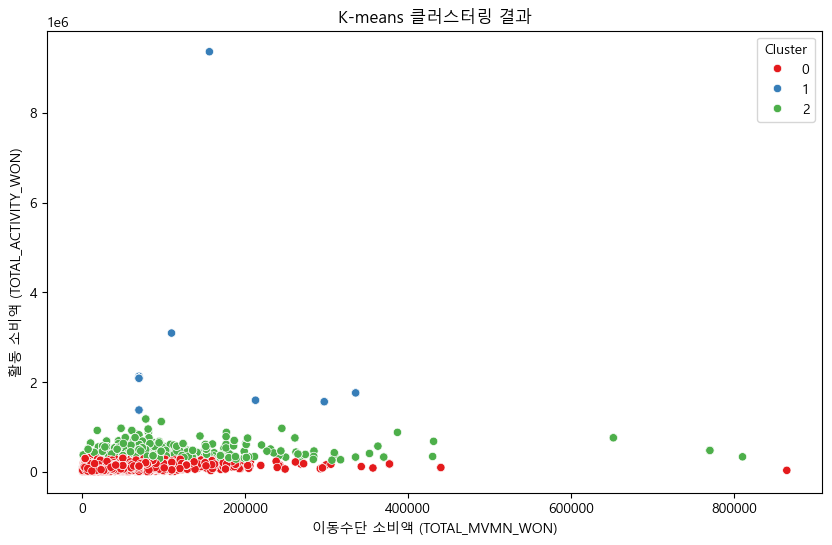

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 필요한 변수 선택 (소비액 관련 변수 및 여행 스타일 변수 등)
X = travel_log[['TOTAL_MVMN_WON', 'TOTAL_ACTIVITY_WON']]

# KMeans 클러스터링 적용
kmeans = KMeans(n_clusters=3, random_state=42)  # 클러스터 개수 3개로 설정
travel_log['Cluster'] = kmeans.fit_predict(X)

# 클러스터별로 소비액의 평균 확인
cluster_means = travel_log.groupby('Cluster')[['TOTAL_MVMN_WON', 'TOTAL_ACTIVITY_WON']].mean()
print(cluster_means)

# 클러스터 분포 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=travel_log, x='TOTAL_MVMN_WON', y='TOTAL_ACTIVITY_WON', hue='Cluster', palette='Set1')
plt.title('K-means 클러스터링 결과')
plt.xlabel('이동수단 소비액 (TOTAL_MVMN_WON)')
plt.ylabel('활동 소비액 (TOTAL_ACTIVITY_WON)')
plt.show()
